<a href="https://colab.research.google.com/github/Jieunlee-svg/dataanalysis_/blob/main/%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EB%B6%84%EC%84%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,025 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


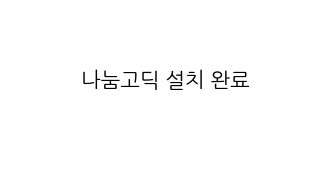

In [5]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# 폰트 캐시 초기화
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 런타임에서 폰트를 새로 인식시킴
import os
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 기본 폰트를 나눔고딕으로 지정
plt.rc('font', family='NanumGothic')

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 확인용 테스트
plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, '나눔고딕 설치 완료', fontsize=15, ha='center')
plt.axis('off')
plt.show()


In [2]:
import pandas as pd

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 첫 번째 시트 로딩
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving poll_answer2.xlsx to poll_answer2.xlsx


공유받고/하고 싶은 건강 정보 (객관식)

In [3]:
# 공유받는 사람 응답 모으기
receive_cols = ['Q6_1(TEXT)', 'Q6_2(TEXT)', 'Q6_3(TEXT)', 'Q6_4(TEXT)']
receive_data = pd.concat([df[col] for col in receive_cols], ignore_index=True)
receive_counts = receive_data.value_counts().sort_values(ascending=True)

# 공유하는 사람 응답 모으기
share_cols = ['Q15_1(TEXT)', 'Q15_2(TEXT)', 'Q15_3(TEXT)', 'Q15_4(TEXT)']
share_data = pd.concat([df[col] for col in share_cols], ignore_index=True)
share_counts = share_data.value_counts().sort_values(ascending=True)

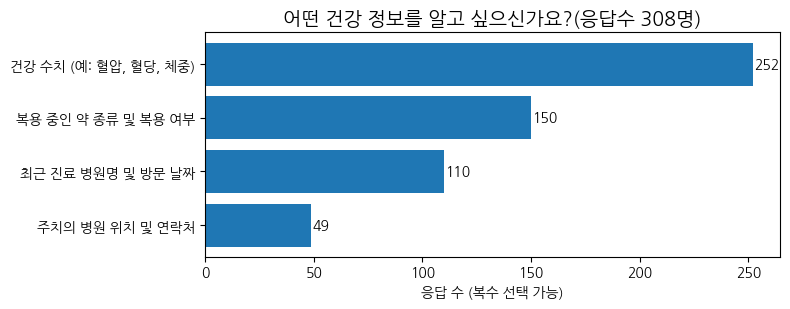

In [6]:
plt.figure(figsize=(8, len(receive_counts)*0.8))
bars = plt.barh(receive_counts.index, receive_counts.values, color='#1f77b4')
plt.title('어떤 건강 정보를 알고 싶으신가요?(응답수 308명)', fontsize=14)
plt.xlabel('응답 수 (복수 선택 가능)')
for bar in bars:
    plt.text(bar.get_width() + 0.5,             # x좌표: 막대 끝 + 여유
             bar.get_y() + bar.get_height()/2,  # y좌표: 막대 중앙
             str(int(bar.get_width())),         # 텍스트: 값
             va='center', fontsize=10)
plt.tight_layout()
plt.show()

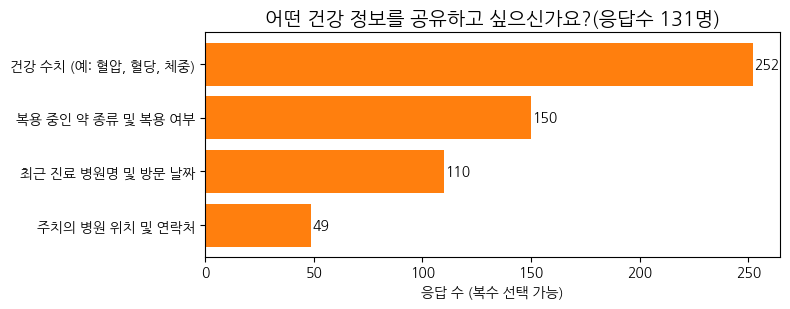

In [7]:
plt.figure(figsize=(8, len(receive_counts)*0.8))
bars = plt.barh(receive_counts.index, receive_counts.values, color='#ff7f0e')
plt.title('어떤 건강 정보를 공유하고 싶으신가요?(응답수 131명)', fontsize=14)
plt.xlabel('응답 수 (복수 선택 가능)')
for bar in bars:
    plt.text(bar.get_width() + 0.5,             # x좌표: 막대 끝 + 여유
             bar.get_y() + bar.get_height()/2,  # y좌표: 막대 중앙
             str(int(bar.get_width())),         # 텍스트: 값
             va='center', fontsize=10)
plt.tight_layout()
plt.show()

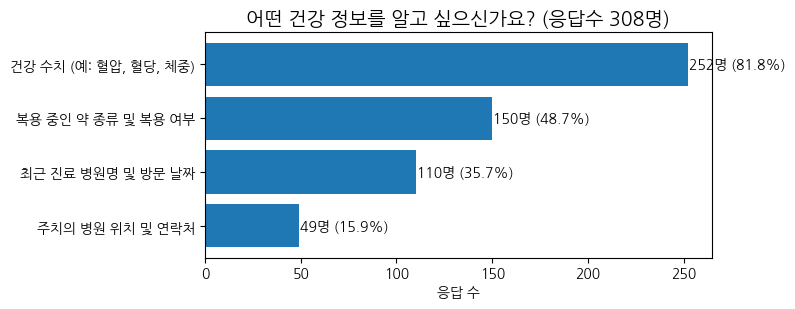

In [8]:
# 공유받는 사람 응답자 수 (NaN이 모두인 행 제외)
num_receive_respondents = df[receive_cols].dropna(how='all').shape[0]

plt.figure(figsize=(8, len(receive_counts)*0.8))
bars = plt.barh(receive_counts.index, receive_counts.values, color='#1f77b4')
plt.title(f'어떤 건강 정보를 알고 싶으신가요? (응답수 {num_receive_respondents}명)', fontsize=14)
plt.xlabel('응답 수')

for bar in bars:
    count = int(bar.get_width())
    percent = count / num_receive_respondents * 100
    label = f'{count}명 ({percent:.1f}%)'
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height()/2,
             label,
             va='center', fontsize=10)

plt.tight_layout()
plt.show()


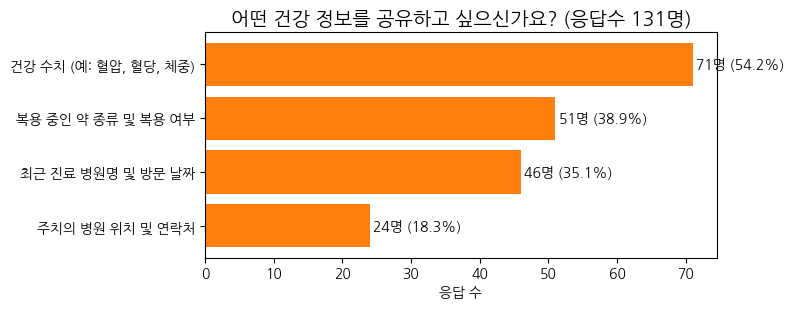

In [9]:
# 공유하는 사람 응답자 수 (NaN이 모두인 행 제외)
num_share_respondents = df[share_cols].dropna(how='all').shape[0]

plt.figure(figsize=(8, len(share_counts)*0.8))
bars = plt.barh(share_counts.index, share_counts.values, color='#ff7f0e')
plt.title(f'어떤 건강 정보를 공유하고 싶으신가요? (응답수 {num_share_respondents}명)', fontsize=14)
plt.xlabel('응답 수')

for bar in bars:
    count = int(bar.get_width())
    percent = count / num_share_respondents * 100
    label = f'{count}명 ({percent:.1f}%)'
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height()/2,
             label,
             va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [10]:
# 공유받는 사람 관련 열
receive_cols = ['Q6_1(TEXT)', 'Q6_2(TEXT)', 'Q6_3(TEXT)', 'Q6_4(TEXT)']

# 공유하는 사람 관련 열
share_cols = ['Q15_1(TEXT)', 'Q15_2(TEXT)', 'Q15_3(TEXT)', 'Q15_4(TEXT)']

# 공유받는 사람 응답자 수 (모두 NaN인 행 제외)
receive_df = df[receive_cols].dropna(how='all')
num_receive_respondents = receive_df.shape[0]

# 공유하는 사람 응답자 수
share_df = df[share_cols].dropna(how='all')
num_share_respondents = share_df.shape[0]

# 각 그룹별 총 응답 수 (즉, 항목 총 선택 수)
total_receive_selections = receive_df.notna().sum().sum()
total_share_selections = share_df.notna().sum().sum()

# 1인당 평균 선택 수
avg_receive = total_receive_selections / num_receive_respondents
avg_share = total_share_selections / num_share_respondents

print(f"📥 공유받는 사람 평균 선택 수: {avg_receive:.2f}개 (총 {total_receive_selections}개 선택, 응답자 {num_receive_respondents}명)")
print(f"📤 공유하는 사람 평균 선택 수: {avg_share:.2f}개 (총 {total_share_selections}개 선택, 응답자 {num_share_respondents}명)")


📥 공유받는 사람 평균 선택 수: 1.82개 (총 561개 선택, 응답자 308명)
📤 공유하는 사람 평균 선택 수: 1.47개 (총 192개 선택, 응답자 131명)


건강 정보 공유 서비스에 대한 우려 요인

In [11]:
# 공유받는 사람 관련 열
receive_cols = ['Q7_1(TEXT)', 'Q7_2(TEXT)', 'Q7_3(TEXT)', 'Q7_4(TEXT)', 'Q7_5(TEXT)', 'Q7_6(TEXT)', 'Q7_7(TEXT)']
# 공유하는 사람 관련 열
share_cols = ['Q16_1(TEXT)', 'Q16_2(TEXT)', 'Q16_3(TEXT)', 'Q16_4(TEXT)', 'Q16_5(TEXT)', 'Q16_6(TEXT)', 'Q16_7(TEXT)']

# 응답자 수 (NaN이 전부인 행 제외)
receive_df = df[receive_cols].dropna(how='all')
share_df = df[share_cols].dropna(how='all')
num_receive = receive_df.shape[0]
num_share = share_df.shape[0]

# 각 항목별 선택 수 집계
receive_counts = pd.concat([receive_df[col] for col in receive_cols]).value_counts().sort_values()
share_counts = pd.concat([share_df[col] for col in share_cols]).value_counts().sort_values()

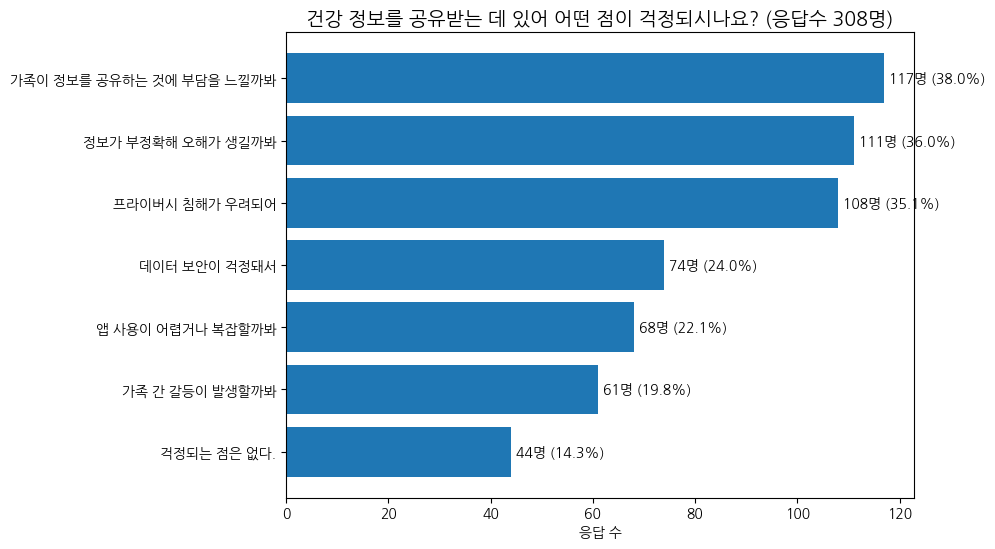

In [12]:
plt.figure(figsize=(10, len(receive_counts) * 0.8))
bars = plt.barh(receive_counts.index, receive_counts.values, color='#1f77b4')
plt.title(f'건강 정보를 공유받는 데 있어 어떤 점이 걱정되시나요? (응답수 {num_receive}명)', fontsize=14)
plt.xlabel('응답 수')

# 빈도 + 비율 표시
for bar in bars:
    count = int(bar.get_width())
    percent = count / num_receive * 100
    label = f'{count}명 ({percent:.1f}%)'
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height()/2,
             label,
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

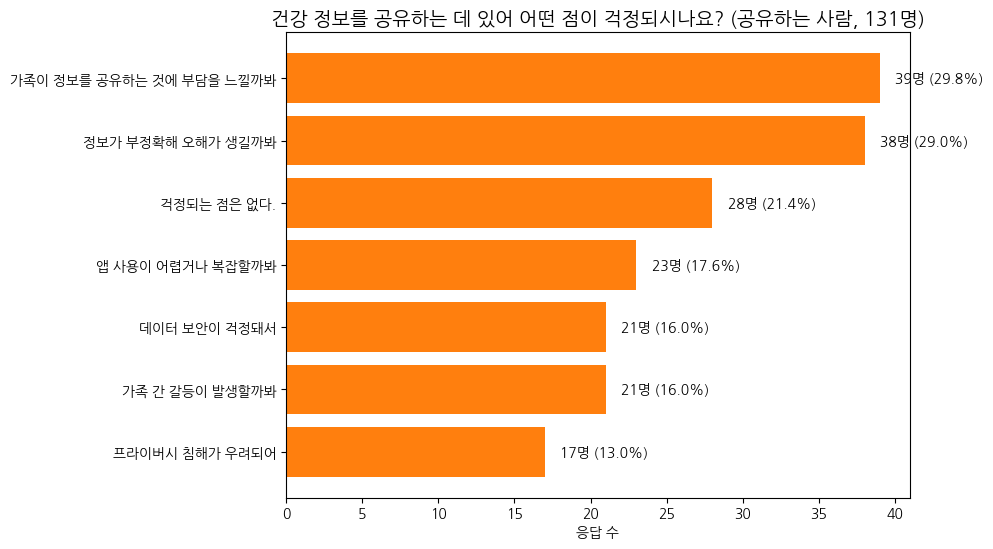

In [13]:
plt.figure(figsize=(10, len(share_counts) * 0.8))
bars = plt.barh(share_counts.index, share_counts.values, color='#ff7f0e')
plt.title(f'건강 정보를 공유하는 데 있어 어떤 점이 걱정되시나요? (공유하는 사람, {num_share}명)', fontsize=14)
plt.xlabel('응답 수')

for bar in bars:
    count = int(bar.get_width())
    percent = count / num_share * 100
    label = f'{count}명 ({percent:.1f}%)'
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height()/2,
             label,
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 첫 번째 시트 로딩
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving poll_answer2.xlsx to poll_answer2 (3).xlsx


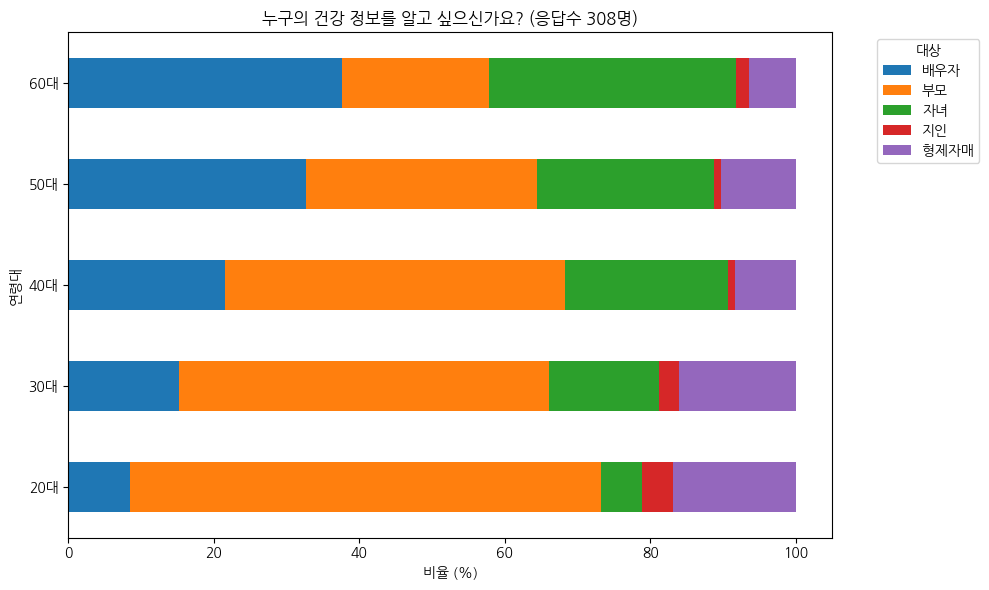

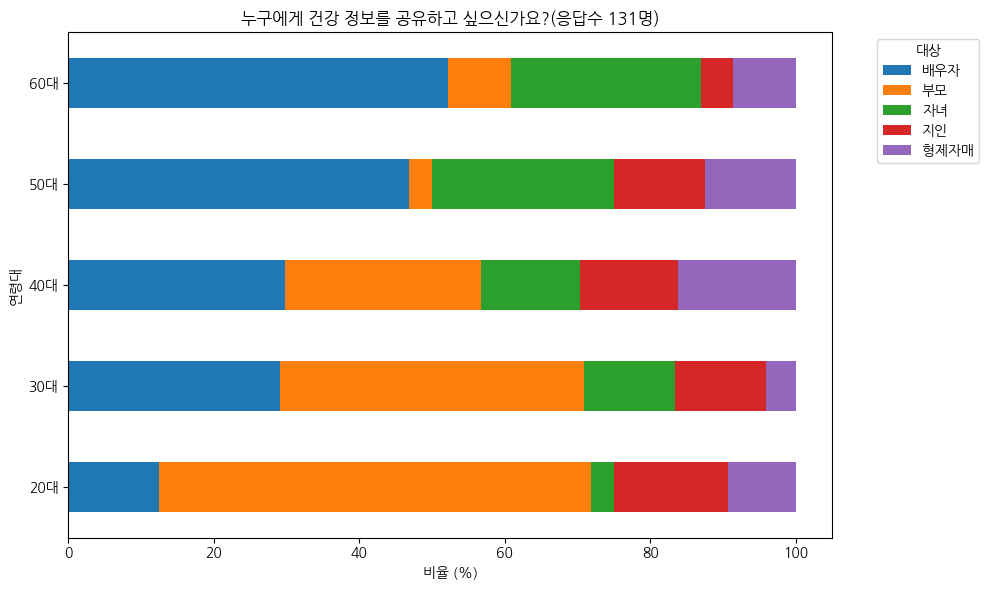

In [14]:
# 연령대 컬럼
age_col = 'AGE_2'

# Q4: 공유 받고 싶은 사람 (복수 응답)
q4_cols = [col for col in df.columns if 'Q4_' in col and '(TEXT)' in col]

# Q13: 공유하고 싶은 사람 (복수 응답)
q13_cols = [col for col in df.columns if 'Q13_' in col and '(TEXT)' in col]

# ------------------------------
# Q4 응답 집계 (공유받고 싶은 사람)
# ------------------------------
q4_long = df[q4_cols + [age_col]].melt(id_vars=age_col, value_name='target').dropna()
q4_count = q4_long.groupby([age_col, 'target']).size().unstack(fill_value=0)

# 비율로 변환
q4_percent = q4_count.div(q4_count.sum(axis=1), axis=0) * 100

# 시각화
q4_percent.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('누구의 건강 정보를 알고 싶으신가요? (응답수 308명)')
plt.xlabel('비율 (%)')
plt.ylabel('연령대')
plt.legend(title='대상', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ------------------------------
# Q13 응답 집계 (공유하고 싶은 사람)
# ------------------------------
q13_long = df[q13_cols + [age_col]].melt(id_vars=age_col, value_name='target').dropna()
q13_count = q13_long.groupby([age_col, 'target']).size().unstack(fill_value=0)

# 비율로 변환
q13_percent = q13_count.div(q13_count.sum(axis=1), axis=0) * 100

# 시각화
q13_percent.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('누구에게 건강 정보를 공유하고 싶으신가요?(응답수 131명)')
plt.xlabel('비율 (%)')
plt.ylabel('연령대')
plt.legend(title='대상', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Q4: 공유 받고 싶은 사람
q4_long = df[q4_cols + [age_col]].melt(id_vars=age_col, value_name='target').dropna()
q4_count = q4_long.groupby([age_col, 'target']).size().unstack(fill_value=0)

# 비율로 변환
q4_percent = q4_count.div(q4_count.sum(axis=1), axis=0) * 100

# 수치 확인
import numpy as np
q4_percent_rounded = np.round(q4_percent, 1)
q4_percent_rounded


target,배우자,부모,자녀,지인,형제자매
AGE_2,,,,,
20대,8.5,64.8,5.6,4.2,16.9
30대,15.2,50.9,15.2,2.7,16.1
40대,21.5,46.7,22.4,0.9,8.4
50대,32.7,31.8,24.3,0.9,10.3
60대,37.6,20.2,33.9,1.8,6.4


In [16]:
# Q13: 공유하고 싶은 사람
q13_long = df[q13_cols + [age_col]].melt(id_vars=age_col, value_name='target').dropna()
q13_count = q13_long.groupby([age_col, 'target']).size().unstack(fill_value=0)

# 비율로 변환
q13_percent = q13_count.div(q13_count.sum(axis=1), axis=0) * 100

# 수치 확인
q13_percent_rounded = np.round(q13_percent, 1)
q13_percent_rounded


target,배우자,부모,자녀,지인,형제자매
AGE_2,,,,,
20대,12.5,59.4,3.1,15.6,9.4
30대,29.2,41.7,12.5,12.5,4.2
40대,29.7,27.0,13.5,13.5,16.2
50대,46.9,3.1,25.0,12.5,12.5
60대,52.2,8.7,26.1,4.3,8.7
